In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import time

In [0]:
# Nombre de valeurs a generer
length = 30000
# Nombre de classes
bins = 500

# Generation des donnees
data = np.random.gamma(2,1, length)

# Histogramme des donnees
y, x = np.histogram(data, bins=bins, density=True)

# Milieu de chaque classe
x = (x + np.roll(x, -1))[:-1]/2.0

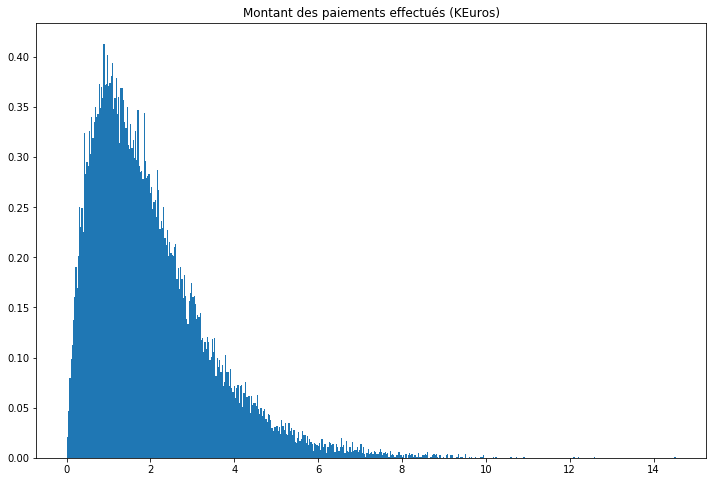

In [3]:
plt.figure(figsize=(12,8))
plt.hist(data, bins, density=True)
plt.title("Montant des paiements effectués (KEuros)")
plt.show()

In [0]:
dist_name = "gamma"

# Parametres de la loi
dist = getattr(scipy.stats,dist_name)

# Modeliser la loi
param = dist.fit(data)

In [5]:
param

(1.9966294537543225, 0.0019177061976509797, 1.003637926823127)

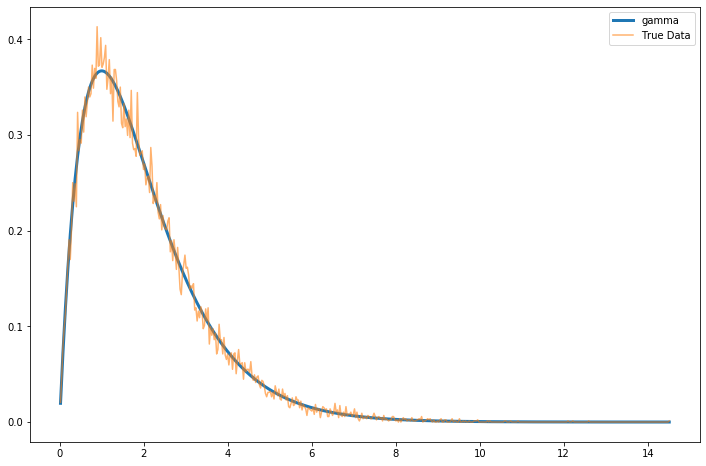

In [7]:
loc = param[-2]
scale = param[-1]
arg = param[:-2]

pdf = dist.pdf(x, loc=loc, scale=scale, *arg)

plt.figure(figsize=(12,8))
plt.plot(x, pdf, label=dist_name, linewidth=3)
plt.plot(x,y,label="True Data", alpha=0.6)
plt.legend()
plt.show()

In [8]:
sse = np.sum((y - pdf)**2)
sse

0.03747911221097163

In [0]:
dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']

In [11]:
sse = np.inf
sse_thr = 0.10

# Pour chaque distribution
for name in dist_names:

	# Modéliser
	dist = getattr(scipy.stats, name)
	param = dist.fit(data)

	# Paramètres
	loc = param[-2]
	scale = param[-1]
	arg = param[:-2]

	# PDF
	pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
	# SSE
	model_sse = np.sum((y - pdf)**2)

	# Si le SSE est ddiminué, enregistrer la loi
	if model_sse < sse :
		best_pdf = pdf
		sse = model_sse
		best_loc = loc
		best_scale = scale
		best_arg = arg
		best_name = name

	# Si en dessous du seuil, quitter la boucle
	if model_sse < sse_thr :
		break

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


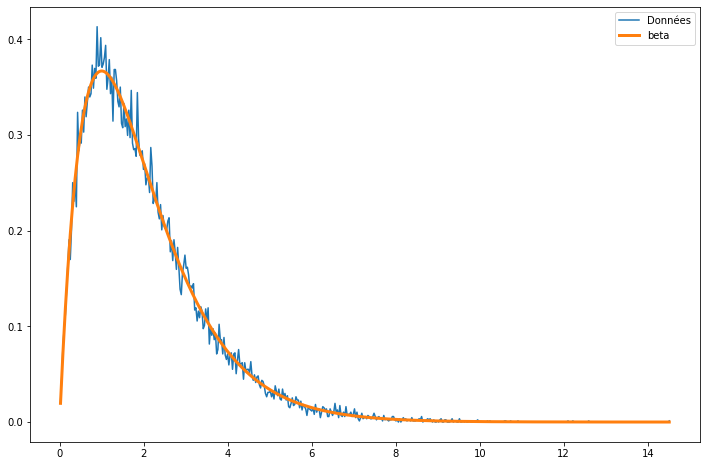

Selected Model :  beta
Loc. param. :  0.002099225063574157
Scale param. :  818424.4842855972
Other arguments :  (1.9942386619174193, 814346.5444826597)
SSE :  0.03750911946515654


In [12]:
plt.figure(figsize=(12,8))
plt.plot(x, y, label="Données")
plt.plot(x, best_pdf, label=best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

In [0]:
 y = y + np.random.randn(bins)/50

In [15]:
sse = np.inf
sse_thr = 0.10

# Pour chaque distribution
for name in dist_names:

	# Modéliser
	dist = getattr(scipy.stats, name)
	param = dist.fit(data)

	# Paramètres
	loc = param[-2]
	scale = param[-1]
	arg = param[:-2]

	# PDF
	pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
	# SSE
	model_sse = np.sum((y - pdf)**2)

	# Si le SSE est ddiminué, enregistrer la loi
	if model_sse < sse :
		best_pdf = pdf
		sse = model_sse
		best_loc = loc
		best_scale = scale
		best_arg = arg
		best_name = name

	# Si en dessous du seuil, quitter la boucle
	if model_sse < sse_thr :
		break

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1682: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


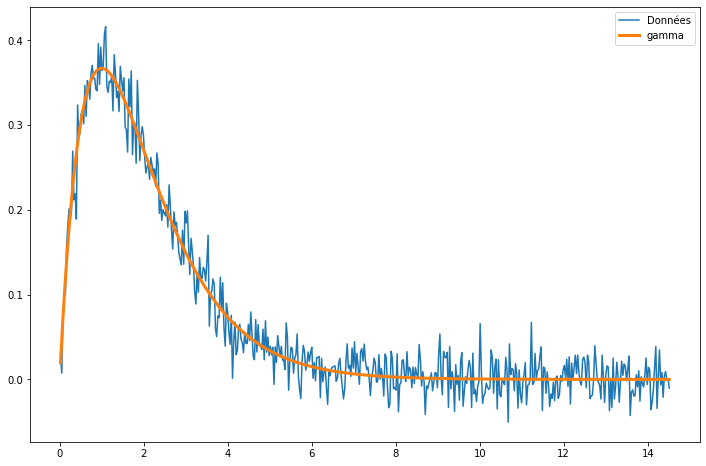

Selected Model :  gamma
Loc. param. :  0.0019177061976509797
Scale param. :  1.003637926823127
Other arguments :  (1.9966294537543225,)
SSE :  0.235104357678779


In [16]:
plt.figure(figsize=(12,8))
plt.plot(x, y, label="Données")
plt.plot(x, best_pdf, label=best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)